In [0]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

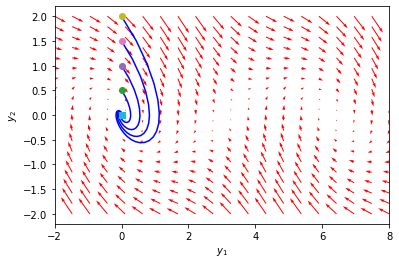

In [6]:
def f(Y, t):
    y1, y2 = Y
    c = 1
    y1p = y2
    y2p = -c*y2 -np.sin(y1)
    return [y1p, y2p]
  

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
#plt.xlim([-2, 4])
#plt.ylim([-4, 4])
#plt.savefig('images/phase-portrait.png')

from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
#plt.savefig('images/phase-portrait-2.png')
plt.show()

